In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завдання 1

In [2]:
A = np.array([[1, 2, 3], [3, 4, 5]])
A

array([[1, 2, 3],
       [3, 4, 5]])

In [3]:
def SVD(A):
    U = A@A.T
    V = A.T@A
    if A.shape[0] < A.shape[1]:
        eigvals, eigvecs = np.linalg.eig(U)

        sorted_indices = np.argsort(-eigvals)
        eigvals = eigvals[sorted_indices]
        U = eigvecs[:, sorted_indices]

        U, _ = np.linalg.qr(U)

        sigmavals = np.sqrt(eigvals)

        eigvals, eigvecs = np.linalg.eig(V)

        sorted_indices = np.argsort(-eigvals)
        eigvals = eigvals[sorted_indices]
        V = eigvecs[:, sorted_indices]

        V, _ = np.linalg.qr(V)
    else:
        eigvals, eigvecs = np.linalg.eig(V)

        sorted_indices = np.argsort(-eigvals)
        eigvals = eigvals[sorted_indices]
        V = eigvecs[:, sorted_indices]

        V, _ = np.linalg.qr(V)

        sigmavals = np.sqrt(eigvals)

        eigvals, eigvecs = np.linalg.eig(U)

        sorted_indices = np.argsort(-eigvals)
        eigvals = eigvals[sorted_indices]
        U = eigvecs[:, sorted_indices]

        U, _ = np.linalg.qr(U)
    s = np.zeros((A.shape[0], A.shape[1]))
    for i in range(len(sigmavals)):
        s[i,i] = sigmavals[i]
    print(U@s@V.T)
    return U, s, V

SVD(A)



[[1. 2. 3.]
 [3. 4. 5.]]


(array([[-0.46410668, -0.88577931],
        [-0.88577931,  0.46410668]]),
 array([[7.97638869, 0.        , 0.        ],
        [0.        , 0.61418515, 0.        ]]),
 array([[-0.39133557,  0.8247362 ,  0.40824829],
        [-0.5605708 ,  0.13817999, -0.81649658],
        [-0.72980603, -0.54837623,  0.40824829]]))

# Завдання 2

## Частина 1

In [4]:
file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')


In [5]:
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ratings_matrix = ratings_matrix.dropna(thresh=100, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=50, axis=1)
ratings_matrix

movieId,1,2,6,10,16,19,21,32,34,39,...,68157,68954,69122,70286,72998,73017,79132,89745,91529,99114
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,2.5,3.0,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
606,2.5,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(ratings_matrix), columns=ratings_matrix.columns)
df_imputed

# df_imputed = ratings_matrix.fillna(0)

# df_imputed = ratings_matrix.fillna(ratings_matrix.mean())


movieId,1,2,6,10,16,19,21,32,34,39,...,68157,68954,69122,70286,72998,73017,79132,89745,91529,99114
0,4.00,3.65,4.00,4.10,4.00,3.25,3.80,4.45,3.90,4.00,...,4.25,4.20,4.05,4.40,4.15,4.35,4.70,4.10,4.30,4.35
1,3.90,3.55,3.70,3.30,3.35,2.85,3.00,2.00,3.95,3.75,...,4.05,3.65,3.00,3.50,3.20,3.85,3.55,3.70,3.45,3.15
2,4.25,4.00,4.00,3.00,4.00,2.00,2.00,4.00,4.00,3.85,...,3.85,3.45,3.25,3.05,3.40,3.75,3.95,4.05,3.75,3.90
3,4.50,3.75,3.80,3.15,3.95,2.20,3.50,3.35,4.05,3.45,...,3.55,3.85,3.40,3.40,3.60,3.65,4.05,3.85,3.90,4.00
4,3.80,3.75,3.85,3.25,3.30,2.65,3.25,3.50,3.95,3.65,...,4.15,4.00,2.90,3.00,2.50,3.00,3.40,3.80,5.00,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,4.00,3.50,4.05,3.70,4.05,2.95,3.55,3.60,3.45,3.50,...,4.00,3.95,3.35,3.65,3.50,4.05,3.95,4.25,3.95,3.80
244,2.50,3.35,4.05,3.55,4.00,2.00,3.95,4.00,3.30,3.20,...,3.70,3.90,3.25,4.00,3.00,3.75,4.30,4.10,3.80,4.20
245,4.00,3.60,4.15,3.45,4.20,2.60,3.70,4.20,3.00,3.85,...,4.25,3.90,3.95,3.70,4.00,3.85,4.25,3.85,4.30,4.30
246,2.50,2.00,3.95,4.00,4.50,2.00,3.50,3.50,3.50,3.00,...,3.85,3.90,4.15,4.15,3.95,4.15,4.30,4.05,4.10,4.10


In [8]:
R = df_imputed.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[-0.14461078, -0.49461078, -0.14461078, ..., -0.04461078,
         0.15538922,  0.20538922],
       [ 0.36916168,  0.01916168,  0.16916168, ...,  0.16916168,
        -0.08083832, -0.38083832],
       [ 0.4257485 ,  0.1757485 ,  0.1757485 , ...,  0.2257485 ,
        -0.0742515 ,  0.0757485 ],
       ...,
       [ 0.15449102, -0.24550898,  0.30449102, ...,  0.00449102,
         0.45449102,  0.45449102],
       [-1.05958084, -1.55958084,  0.39041916, ...,  0.49041916,
         0.54041916,  0.54041916],
       [ 0.87739521, -0.22260479,  0.87739521, ...,  0.87739521,
         0.37739521,  0.37739521]])

In [9]:
from scipy.sparse.linalg import svds
U, sigma, V = svds(R_demeaned, k=3)
U

array([[-2.56167162e-02, -2.78820380e-02, -5.89210894e-02],
       [-1.18344845e-01, -7.28718734e-02, -5.49996108e-02],
       [ 3.93432367e-03, -1.67942221e-01, -3.05337719e-02],
       [-7.87069793e-02, -4.46510529e-02, -6.51220541e-02],
       [ 1.22154369e-02, -1.19847929e-01, -3.10288279e-02],
       [-5.56011889e-02, -1.02791599e-01, -5.40314740e-02],
       [ 1.80789684e-02, -3.38762583e-02, -6.02625838e-02],
       [ 3.05689970e-02,  1.00581442e-02, -6.94264092e-02],
       [-2.12240019e-02,  3.97409334e-02, -8.32156463e-02],
       [-5.03810305e-02, -8.20100500e-02, -6.96339171e-02],
       [ 5.97872551e-02, -1.54834268e-01, -2.15425901e-02],
       [-2.31132678e-01, -1.39720264e-01, -5.23886989e-02],
       [-1.05975313e-03, -1.73417620e-04, -5.52757735e-02],
       [ 3.77763344e-03, -8.34760175e-03, -5.39050124e-02],
       [ 5.53855219e-02, -1.00230508e-01, -3.93770310e-02],
       [ 1.81025729e-02,  1.83183511e-02, -4.41961935e-02],
       [ 1.46302609e-02, -2.50171165e-03

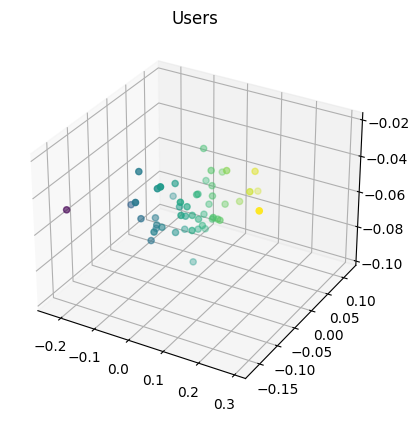

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(U[:50, 0], U[:50, 1], U[:50, 2], c=U[:50, 0]+U[:50, 1]+U[:50, 2], cmap='viridis')

ax.set_title('Users')

plt.show()

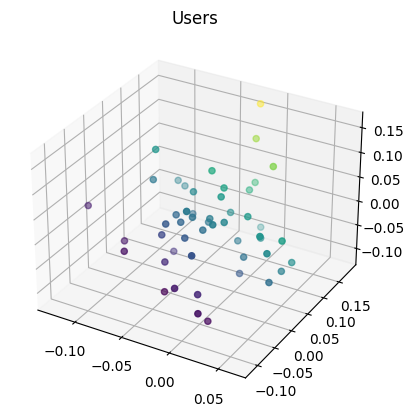

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(V[0, :50], V[1, :50], V[2, :50], c=V[0, :50]+V[1, :50]+V[2, :50], cmap='viridis')

ax.set_title('Users')

plt.show()

## Частина 2

In [12]:
file_path = 'ratings.csv'
df = pd.read_csv(file_path)

ratings_matrix = df.pivot(index='userId', columns='movieId', values='rating')


In [13]:
ratings_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings_matrix = ratings_matrix.dropna(thresh=30, axis=0)
ratings_matrix = ratings_matrix.dropna(thresh=30, axis=1)
ratings_matrix

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(ratings_matrix), columns=ratings_matrix.columns)
df_imputed

# df_imputed = ratings_matrix.fillna(0)

# df_imputed = ratings_matrix.fillna(ratings_matrix.mean())


movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
0,4.00,3.65,4.00,3.30,4.00,3.25,3.55,4.00,4.30,3.85,...,3.80,4.25,4.10,4.10,4.25,4.40,4.15,3.85,4.40,4.45
1,3.60,3.05,2.55,3.25,3.60,3.10,3.75,3.40,3.65,3.25,...,3.75,3.85,4.20,4.10,4.25,3.75,3.70,3.75,3.20,3.85
2,4.30,3.40,3.40,3.00,3.65,3.00,3.60,3.60,3.05,3.65,...,3.50,3.80,4.10,3.50,3.90,3.20,3.95,3.80,3.70,3.40
3,4.00,3.35,3.25,3.20,4.00,2.95,4.05,3.55,3.75,3.45,...,3.40,4.15,4.00,3.70,3.75,4.30,3.90,3.40,3.55,4.15
4,4.45,4.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,4.00,...,3.80,4.35,3.90,3.75,4.00,4.15,3.95,4.35,4.10,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2.50,3.45,3.15,2.45,3.85,2.50,3.65,2.50,4.20,4.00,...,4.00,4.00,3.80,3.90,3.90,3.70,4.10,4.25,4.20,4.20
497,4.00,3.70,3.85,3.45,3.85,4.00,3.75,3.00,4.15,3.55,...,3.85,4.25,4.35,3.60,3.80,4.40,4.05,3.80,4.35,4.10
498,2.50,2.00,2.00,2.55,4.15,3.50,4.00,3.65,4.50,4.05,...,4.00,4.30,4.15,3.75,3.95,4.10,4.20,4.10,3.95,4.15
499,3.00,3.10,3.00,2.75,3.80,3.15,4.00,3.45,3.85,3.65,...,3.75,3.70,3.85,3.75,3.80,3.60,4.10,3.85,3.10,3.40


In [16]:
R = df_imputed.values
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[-1.33720930e-03, -3.51337209e-01, -1.33720930e-03, ...,
        -1.51337209e-01,  3.98662791e-01,  4.48662791e-01],
       [ 2.27790698e-01, -3.22209302e-01, -8.22209302e-01, ...,
         3.77790698e-01, -1.72209302e-01,  4.77790698e-01],
       [ 8.31046512e-01, -6.89534884e-02, -6.89534884e-02, ...,
         3.31046512e-01,  2.31046512e-01, -6.89534884e-02],
       ...,
       [-9.99825581e-01, -1.49982558e+00, -1.49982558e+00, ...,
         6.00174419e-01,  4.50174419e-01,  6.50174419e-01],
       [-4.35581395e-01, -3.35581395e-01, -4.35581395e-01, ...,
         4.14418605e-01, -3.35581395e-01, -3.55813953e-02],
       [ 1.11017442e+00, -1.39825581e-01, -5.89825581e-01, ...,
        -3.89825581e-01,  6.10174419e-01,  1.10174419e-01]])

In [36]:
from scipy.sparse.linalg import svds
U, sigma, V = svds(R_demeaned, k=5)
U@np.diag(sigma)@V

array([[ 4.15492229e-01,  4.74207728e-02, -2.22802518e-01, ...,
         1.49080304e-01,  3.98937891e-01,  4.17187445e-01],
       [ 9.96415384e-02, -4.25303310e-01, -7.32688158e-01, ...,
         4.83331709e-01,  5.44517608e-02,  3.21991269e-01],
       [ 5.60778152e-01, -8.31441272e-04, -1.10450923e-01, ...,
         2.69772107e-01,  1.13444542e-01,  1.33139723e-01],
       ...,
       [-4.40647769e-01, -6.92601866e-01, -1.21240996e+00, ...,
         6.35285116e-01,  4.93220785e-01,  7.88038099e-01],
       [ 2.13668393e-01, -2.39488769e-01, -4.54108637e-01, ...,
         3.74164437e-01,  2.53735549e-01,  3.23466801e-01],
       [ 3.11037082e-01, -1.52115882e-01, -4.90835116e-01, ...,
         2.62939745e-01,  4.20024977e-01,  4.89994920e-01]])

Чим більше к тим краще відновлення</br>

In [38]:
all_user_predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), V) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=ratings_matrix.columns, index=ratings_matrix.index)
preds_df

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.416829,4.048758,3.778535,3.519328,4.362527,3.588048,3.859108,3.874399,4.208324,4.111467,...,4.059061,4.337912,4.243702,4.320734,4.269773,4.294499,4.121775,4.150418,4.400275,4.418525
3,3.471851,2.946906,2.639521,2.544859,3.783139,2.989864,3.801313,3.435684,3.314670,2.875414,...,3.550335,3.728161,3.803539,3.888024,4.070788,3.784929,3.697994,3.855541,3.426661,3.694201
4,4.029732,3.468122,3.358503,2.948498,3.929751,3.335438,3.439445,3.742738,3.603354,3.615228,...,3.567840,3.863682,3.829712,3.536209,3.815703,3.511716,3.928721,3.738726,3.582398,3.602093
5,3.904749,3.439612,3.248744,2.823108,3.962247,3.232390,3.392787,3.577420,3.916471,3.914865,...,3.748754,3.997934,3.947209,3.709701,3.800749,3.661692,4.037661,3.833352,3.867527,3.863853
6,4.383455,4.096933,3.885620,3.653489,4.049372,3.666316,3.764115,4.100652,3.655610,3.837509,...,3.917750,4.139227,3.932565,3.773452,4.109194,4.120666,4.013429,3.885679,4.001309,4.083571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.754387,3.293597,3.121911,2.588175,3.999634,3.195667,3.297380,3.476873,4.244680,4.257574,...,3.883542,4.094180,4.084917,3.734934,3.714453,3.576483,4.257530,3.932449,3.989033,3.925045
607,4.167192,3.925766,3.695152,3.365490,4.006097,3.489796,3.532973,3.832062,3.960692,4.156505,...,3.972934,4.166531,3.974567,3.779011,3.916164,4.019510,4.089152,3.875314,4.152146,4.156377
608,3.059178,2.807224,2.287416,2.097661,3.742930,2.801320,3.728214,3.273242,3.931970,3.668810,...,4.174271,4.143798,4.104025,4.020938,4.055554,4.159919,4.243825,4.135111,3.993046,4.287864


In [40]:
df_imputed

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
0,4.00,3.65,4.00,3.30,4.00,3.25,3.55,4.00,4.30,3.85,...,3.80,4.25,4.10,4.10,4.25,4.40,4.15,3.85,4.40,4.45
1,3.60,3.05,2.55,3.25,3.60,3.10,3.75,3.40,3.65,3.25,...,3.75,3.85,4.20,4.10,4.25,3.75,3.70,3.75,3.20,3.85
2,4.30,3.40,3.40,3.00,3.65,3.00,3.60,3.60,3.05,3.65,...,3.50,3.80,4.10,3.50,3.90,3.20,3.95,3.80,3.70,3.40
3,4.00,3.35,3.25,3.20,4.00,2.95,4.05,3.55,3.75,3.45,...,3.40,4.15,4.00,3.70,3.75,4.30,3.90,3.40,3.55,4.15
4,4.45,4.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,4.00,...,3.80,4.35,3.90,3.75,4.00,4.15,3.95,4.35,4.10,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2.50,3.45,3.15,2.45,3.85,2.50,3.65,2.50,4.20,4.00,...,4.00,4.00,3.80,3.90,3.90,3.70,4.10,4.25,4.20,4.20
497,4.00,3.70,3.85,3.45,3.85,4.00,3.75,3.00,4.15,3.55,...,3.85,4.25,4.35,3.60,3.80,4.40,4.05,3.80,4.35,4.10
498,2.50,2.00,2.00,2.55,4.15,3.50,4.00,3.65,4.50,4.05,...,4.00,4.30,4.15,3.75,3.95,4.10,4.20,4.10,3.95,4.15
499,3.00,3.10,3.00,2.75,3.80,3.15,4.00,3.45,3.85,3.65,...,3.75,3.70,3.85,3.75,3.80,3.60,4.10,3.85,3.10,3.40


In [42]:
ratings_matrix

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
ratings_matrix

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
preds_df

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.416829,4.048758,3.778535,3.519328,4.362527,3.588048,3.859108,3.874399,4.208324,4.111467,...,4.059061,4.337912,4.243702,4.320734,4.269773,4.294499,4.121775,4.150418,4.400275,4.418525
3,3.471851,2.946906,2.639521,2.544859,3.783139,2.989864,3.801313,3.435684,3.314670,2.875414,...,3.550335,3.728161,3.803539,3.888024,4.070788,3.784929,3.697994,3.855541,3.426661,3.694201
4,4.029732,3.468122,3.358503,2.948498,3.929751,3.335438,3.439445,3.742738,3.603354,3.615228,...,3.567840,3.863682,3.829712,3.536209,3.815703,3.511716,3.928721,3.738726,3.582398,3.602093
5,3.904749,3.439612,3.248744,2.823108,3.962247,3.232390,3.392787,3.577420,3.916471,3.914865,...,3.748754,3.997934,3.947209,3.709701,3.800749,3.661692,4.037661,3.833352,3.867527,3.863853
6,4.383455,4.096933,3.885620,3.653489,4.049372,3.666316,3.764115,4.100652,3.655610,3.837509,...,3.917750,4.139227,3.932565,3.773452,4.109194,4.120666,4.013429,3.885679,4.001309,4.083571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.754387,3.293597,3.121911,2.588175,3.999634,3.195667,3.297380,3.476873,4.244680,4.257574,...,3.883542,4.094180,4.084917,3.734934,3.714453,3.576483,4.257530,3.932449,3.989033,3.925045
607,4.167192,3.925766,3.695152,3.365490,4.006097,3.489796,3.532973,3.832062,3.960692,4.156505,...,3.972934,4.166531,3.974567,3.779011,3.916164,4.019510,4.089152,3.875314,4.152146,4.156377
608,3.059178,2.807224,2.287416,2.097661,3.742930,2.801320,3.728214,3.273242,3.931970,3.668810,...,4.174271,4.143798,4.104025,4.020938,4.055554,4.159919,4.243825,4.135111,3.993046,4.287864


In [74]:
recs = preds_df.mask(ratings_matrix.notnull(), None)
recs

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,4.048758,NaN,3.519328,NaN,3.588048,3.859108,3.874399,4.208324,4.111467,...,4.059061,4.337912,4.243702,4.320734,4.269773,4.294499,4.121775,4.150418,4.400275,4.418525
3,3.471851,2.946906,2.639521,2.544859,3.783139,2.989864,3.801313,3.435684,3.314670,2.875414,...,3.550335,3.728161,3.803539,3.888024,4.070788,3.784929,3.697994,3.855541,3.426661,3.694201
4,4.029732,3.468122,3.358503,2.948498,3.929751,3.335438,3.439445,3.742738,3.603354,3.615228,...,3.567840,3.863682,3.829712,3.536209,3.815703,3.511716,3.928721,3.738726,3.582398,3.602093
5,NaN,3.439612,3.248744,2.823108,3.962247,3.232390,3.392787,3.577420,3.916471,3.914865,...,3.748754,3.997934,3.947209,3.709701,3.800749,3.661692,4.037661,3.833352,3.867527,3.863853
6,4.383455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.917750,4.139227,3.932565,3.773452,4.109194,4.120666,4.013429,3.885679,4.001309,4.083571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,3.293597,3.121911,2.588175,3.999634,NaN,3.297380,NaN,4.244680,NaN,...,3.883542,4.094180,4.084917,3.734934,3.714453,3.576483,4.257530,3.932449,3.989033,3.925045
607,NaN,3.925766,3.695152,3.365490,4.006097,3.489796,3.532973,NaN,3.960692,4.156505,...,3.972934,4.166531,3.974567,3.779011,3.916164,4.019510,4.089152,3.875314,4.152146,4.156377
608,NaN,NaN,NaN,2.097661,3.742930,2.801320,NaN,3.273242,NaN,3.668810,...,4.174271,4.143798,4.104025,4.020938,4.055554,4.159919,4.243825,4.135111,3.993046,4.287864


In [77]:
movies = pd.read_csv('movies.csv')
def user_recommendations(user_id):
    user_recs = recs.loc[user_id].sort_values(ascending=False)
    return movies[movies['movieId'].isin(user_recs.index[0:10])][['title', 'genres']].reset_index(drop=True)
user_recommendations(1)

,title,genres
0,Taxi Driver (1976),Crime|Drama|Thriller
1,"Shawshank Redemption, The (1994)",Crime|Drama
2,Terminator 2: Judgment Day (1991),Action|Sci-Fi
3,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
4,"Godfather, The (1972)",Crime|Drama
5,It's a Wonderful Life (1946),Children|Drama|Fantasy|Romance
6,One Flew Over the Cuckoo's Nest (1975),Drama
7,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western
8,"Godfather: Part II, The (1974)",Crime|Drama
9,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy


In [73]:
movies = pd.read_csv('movies.csv')
movies[movies['movieId'].isin(user_recs.index[0:10])][['title']].reset_index(drop=True)


,title
0,Taxi Driver (1976)
1,"Shawshank Redemption, The (1994)"
2,Terminator 2: Judgment Day (1991)
3,Dr. Strangelove or: How I Learned to Stop Worr...
4,"Godfather, The (1972)"
5,It's a Wonderful Life (1946)
6,One Flew Over the Cuckoo's Nest (1975)
7,"Good, the Bad and the Ugly, The (Buono, il bru..."
8,"Godfather: Part II, The (1974)"
9,"Lord of the Rings: The Fellowship of the Ring,..."
